In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))

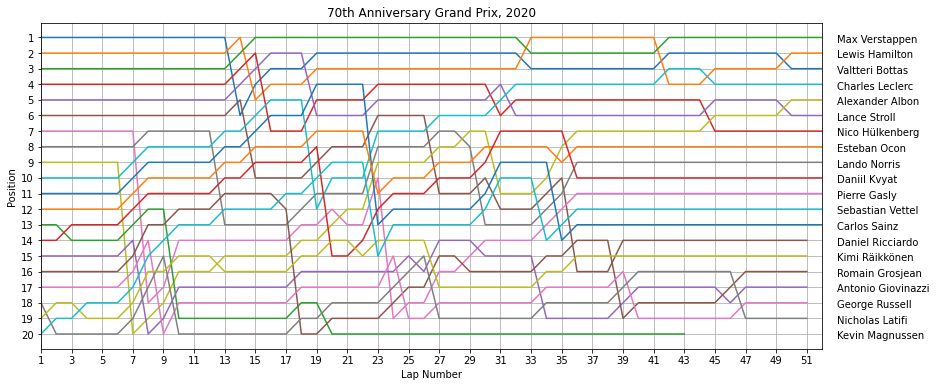

In [2]:
raceId = races_df[(races_df["year"] == 2020) & (races_df["round"] == 5)]["raceId"]
race_df = lap_times_df[lap_times_df["raceId"] == int(raceId)]
driver_list = race_df["driverId"].drop_duplicates()

plt.figure(figsize=(14, 6))    

for driver in driver_list:
    x = race_df[race_df["driverId"] == driver]["lap"]
    y = race_df[race_df["driverId"] == driver]["position"]
    plt.plot(x, y)
    y_pos = results_df[(results_df["raceId"] == int(raceId)) & (results_df["driverId"] == driver)]["positionOrder"] + 0.3
    driver_info = drivers_df[drivers_df["driverId"] == driver]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.text(race_df["lap"].values.max() + 1, y_pos, driver_name.iloc[0])

plt.gca().invert_yaxis()
plt.grid()

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.yticks(np.arange(race_df["lap"].values.min(), 21, 1.0))

plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())

race_name = races_df[races_df["raceId"] == int(raceId)]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == int(raceId)]["year"].iloc[0]
plt.title(str(race_name) + ', ' + str(race_year))
plt.xlabel('Lap Number')
plt.ylabel('Position')

plt.show()